In [2]:
%matplotlib inline

from pathlib import Path

import collections
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## 19.1 

#### A, B, C, D, E의 노드로 구성된 무방향성 네트워크를 고려해보자. A는 B와 C에 연결되어 있고, B는 A와 C에 연결되어 있다. C는 A, B, D와 연결되어 있고, D는 C와 E, E는 D와 연결되어 있다.

#### a. 위를 표현하는 네트워크 그래프를 그려 보시오.

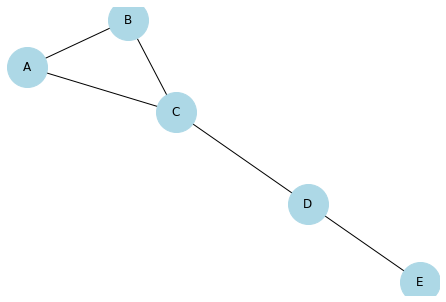

In [3]:
# Build a dataframe that defines the edges and use to build the graph
df = pd.DataFrame([("A", "B"), ("A", "C"), ("B", "C"), ("C", "D"), ("D", "E")], columns=['from', 'to'])
G = nx.from_pandas_edgelist(df, 'from', 'to')
 
# Plot it
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1600)
plt.show()


#### b. 네트워크 그래프에서 어떤 노드(들)를 제거해야 나머지 노드들이 클릭을 구성할까?

D, E를 제거하면 A, B, C 각각의 노드가 다른 모든 노드에 연결된 클릭이 된다.

#### c. 노드 A의 연결도를 구하시오.

A의 연결도: 2  
B, C와 연결되어 있음.

#### d. 어떤 노드가 가장 작은 연결도를 가지고 있는지 알아보시오.

E. 연결도가 1로 가장 작다. (연결된 노드가 D 하나뿐임.)

#### e. 본 네트워크 그래프에 대한 연결도 분포를 표로 나타내 보시오.

In [4]:
print(G.degree())

[('A', 2), ('B', 2), ('C', 3), ('D', 2), ('E', 1)]


In [5]:
degrees = ['Degree 0', 'Degree 1', 'Degree 2', 'Degree 3']
frequency = [0, 1, 3, 1]
degree_df = pd.DataFrame({'Degree':degrees, 'Frequency':frequency})
print(degree_df)

     Degree  Frequency
0  Degree 0          0
1  Degree 1          1
2  Degree 2          3
3  Degree 3          1


#### f. 본 네트워크는 서로 연결(connected)되었는지 알아보시오.

모든 노드 간 경로가 존재하므로 서로 연결된 연결 네트워크(connected network)이다.

#### g. 본 네트워크의 밀도(density)를 계산해 보시오.

In [6]:
nx.density(G)

0.5

In [7]:
e = 5
n = 5

e/(n*(n-1)/2)

0.5

## 19.2

#### 연습문제 19.1에서 만들어진 그래프에 두 개의 새로운 노드가 추가되었다고 하자.

#### a. 몇 퍼센트의 노드가 증가했는가?

40%만큼 증가,,,,,? 이 얘기 맞음?

#### b. 몇 퍼센트의 가능한 연결선(edge)이 증가했는가?

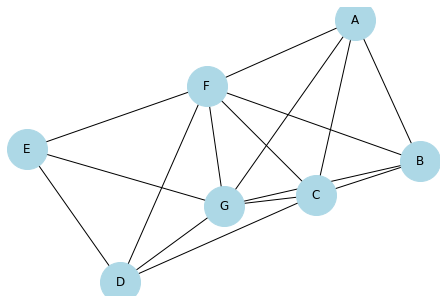

In [13]:
# Build a dataframe that defines the edges and use to build the graph
df = pd.DataFrame([("A", "B"), ("A", "C"), ('A', 'F'), ('A', 'G'), ("B", "C"), ('B', 'F'), ('B', 'G'),
                   ("C", "D"), ('C', 'F'), ('C', 'G'), ("D", "E"), ('D', 'F'), ('D', 'G'), ('E', 'F'), ('E', 'G'), ('F', 'G')
                  ], columns=['from', 'to'])
G = nx.from_pandas_edgelist(df, 'from', 'to')
 
# Plot it
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1600)
plt.show()

연결선이 16개까지 증가 가능. 기존 5개 연결선에 추가로 11개 증가했으므로 220%만큼 증가

#### c. 새로이 추가된 노드가 기존 노드들이 가지고 있는 연결선의 중심값(median)을 가지고 있다고 가정하면, 네트워크 밀도에는 어떻게 영향을 미칠까?

잘 모르겠음  
- 기존 노드들이 가지고 있는 연결선의 중심값 = 기존 노드들이 가지고 있는 degree의 중심값을 의미? 
- 두 개 노드가 추가되고 난 상태에서의 degree를 따졌을 때 그 값이 중심값이라는 건지 / 노드를 추가하기 전의 degree의 중심값을 degree로 가진다는 건지 모르겠음

#### d. 크기가 다른 네트워크의 밀도를 비교할 때 주의해야 할 점은? 

네트워크의 크기는 뭘로 따짐...? 노드 개수랑 연결선 수...?

#### e. 새롭게 추가된 노드를 원하는 곳에 연결하고 그로부터 생성되는 네트워크 그래프의 연결도 분포를 표로 만들어 보시오.

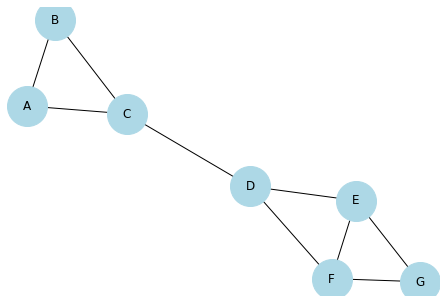

In [14]:
# Build a dataframe that defines the edges and use to build the graph
df = pd.DataFrame([("A", "B"), ("A", "C"), ("B", "C"), ("C", "D"), 
                   ("D", "E"), ('D', 'F'), ('E', 'F'), ('E', 'G'), ('F', 'G')
                  ], columns=['from', 'to'])
G = nx.from_pandas_edgelist(df, 'from', 'to')
 
# Plot it
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1600)
plt.show()

In [15]:
print(G.degree())

[('A', 2), ('B', 2), ('C', 3), ('D', 3), ('E', 3), ('F', 3), ('G', 2)]


In [16]:
degrees = ['Degree 0', 'Degree 1', 'Degree 2', 'Degree 3']
frequency = [0, 0, 3, 3]
degree_df = pd.DataFrame({'Degree':degrees, 'Frequency':frequency})
print(degree_df)

     Degree  Frequency
0  Degree 0          0
1  Degree 1          0
2  Degree 2          3
3  Degree 3          3


## 19.3

#### <그림 19.10> 네트워크를 이용하여 다음 문제를 해결하시오.

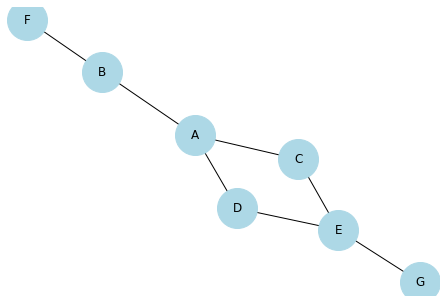

In [24]:
# Build a dataframe that defines the edges and use to build the graph
df = pd.DataFrame([("A", "B"), ("A", "C"), ('A', 'D'), ("B", "F"), ("C", "E"), 
                   ("D", "E"), ('E', 'G')], columns=['from', 'to'])
G = nx.from_pandas_edgelist(df, 'from', 'to')
 
# Plot it
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1600)
plt.show()

#### a. 공통 이웃 스코어(common neighbor score)를 이용하여 다음번 연결선을 예측해 보시오.(즉, 어느 링크가 가장 높은 확률로 연결될지 예측해 보시오.)

* 연결되어 있지 않은 두 노드들 간에 공통의 노드들이 공유된다면,  
이 둘은 이후에 연결될 가능성이 높다는 것이다.

In [34]:
G.nodes

NodeView(('A', 'B', 'C', 'D', 'F', 'E', 'G'))

In [56]:
from itertools import combinations

preds = nx.common_neighbor_centrality(G, list(combinations(G.nodes, 2)))

for u, v, p in preds:
    print(f"({u}, {v}) -> {p}")

(A, B) -> 1.3999999999999997
(A, C) -> 1.3999999999999997
(A, D) -> 1.3999999999999997
(A, F) -> 1.5
(A, E) -> 2.3
(A, G) -> 0.4666666666666666
(B, C) -> 1.5
(B, D) -> 1.5
(B, F) -> 1.3999999999999997
(B, E) -> 0.4666666666666666
(B, G) -> 0.3499999999999999
(C, D) -> 2.3
(C, F) -> 0.4666666666666666
(C, E) -> 1.3999999999999997
(C, G) -> 1.5
(D, F) -> 0.4666666666666666
(D, E) -> 1.3999999999999997
(D, G) -> 1.5
(F, E) -> 0.3499999999999999
(F, G) -> 0.2799999999999999
(E, G) -> 1.3999999999999997


(A, E)의 공통 이웃 스코어와 (C, D)의 공통 이웃 스코어가 2.3으로 가장 높으므로  
다음 번 연결로는 (A, E)나 (C, D)가 연결될 것이다.

In [47]:
# 노드 쌍별 공통 이웃

for nodes in combinations(G.nodes, 2):
    print(nodes, ':', sorted(nx.common_neighbors(G, nodes[0], nodes[1])))

('A', 'B') : []
('A', 'C') : []
('A', 'D') : []
('A', 'F') : ['B']
('A', 'E') : ['C', 'D']
('A', 'G') : []
('B', 'C') : ['A']
('B', 'D') : ['A']
('B', 'F') : []
('B', 'E') : []
('B', 'G') : []
('C', 'D') : ['A', 'E']
('C', 'F') : []
('C', 'E') : []
('C', 'G') : ['E']
('D', 'F') : []
('D', 'E') : []
('D', 'G') : ['E']
('F', 'E') : []
('F', 'G') : []
('E', 'G') : []


#### b. 최단경로 스코어를 이용하여 연결이 가장 안 될 링크를 예측해 보시오.

In [72]:
for start_node, end_node in combinations(G.nodes, 2):
    if len(nx.dijkstra_path(G,start_node,end_node)) != 2:
        print(f"{start_node}-{end_node} : {nx.dijkstra_path(G,start_node,end_node)}")

A-F : ['A', 'B', 'F']
A-E : ['A', 'C', 'E']
A-G : ['A', 'C', 'E', 'G']
B-C : ['B', 'A', 'C']
B-D : ['B', 'A', 'D']
B-E : ['B', 'A', 'C', 'E']
B-G : ['B', 'A', 'C', 'E', 'G']
C-D : ['C', 'A', 'D']
C-F : ['C', 'A', 'B', 'F']
C-G : ['C', 'E', 'G']
D-F : ['D', 'A', 'B', 'F']
D-G : ['D', 'E', 'G']
F-E : ['F', 'B', 'A', 'C', 'E']
F-G : ['F', 'B', 'A', 'C', 'E', 'G']


F에서 G로(또는 G에서 F로) 갈 때의 최단경로가 가장 길기 때문에 F-G 연결이 가장 안 될 것으로 예상된다.

## 19.4